# Predicted US Job Losses Due to Automation

In this notebook, we will break down predicted job losses due to automation on a state-by-state basis.

First, we load the raw data and look at the structure.

In [1]:
import numpy as np
import pandas as pd

salary_data = pd.read_excel('../data/occupation-automation/occupation_salary.xlsx')
salary_data['SOC'] = salary_data['OCC_CODE']
salary_data

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,...,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,SOC
0,00-0000,All Occupations,total,140400040,0.1,23.86,49630,0.1,9.27,11.6,...,28.92,45.45,19290,24140,37040,60150,94540,NaN,NaN,00-0000
1,11-0000,Management Occupations,major,7090790,0.2,56.74,118020,0.1,22.76,32.99,...,70.72,#,47330,68630,100790,147090,#,NaN,NaN,11-0000
2,11-1000,Top Executives,minor,2465800,0.2,61.03,126950,0.2,20.58,31.45,...,78.35,#,42810,65420,102320,162970,#,NaN,NaN,11-1000
3,11-1010,Chief Executives,broad,223260,0.7,93.44,194350,0.4,33.55,54.86,...,#,#,69780,114100,181210,#,#,NaN,NaN,11-1010
4,11-1011,Chief Executives,detailed,223260,0.7,93.44,194350,0.4,33.55,54.86,...,#,#,69780,114100,181210,#,#,NaN,NaN,11-1011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,53-7111,Mine Shuttle Car Operators,detailed,1590,7.0,27.1,56370,1.3,21.21,23.98,...,29.91,32.73,44120,49880,56450,62200,68080,NaN,NaN,53-7111
1390,53-7120,"Tank Car, Truck, and Ship Loaders",broad,10920,13.1,19.04,39590,2.5,10.82,13.25,...,22.78,31.82,22510,27570,35770,47380,66190,NaN,NaN,53-7120
1391,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,10920,13.1,19.04,39590,2.5,10.82,13.25,...,22.78,31.82,22510,27570,35770,47380,66190,NaN,NaN,53-7121
1392,53-7190,Miscellaneous Material Moving Workers,broad,23880,3.7,16.61,34540,2.0,10,10.85,...,20.65,28.29,20810,22570,28370,42950,58840,NaN,NaN,53-7190


In [2]:
automation_data = pd.read_csv('../data/occupation-automation/automation_data_by_state.csv')
automation_data

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,53-7072,Pump Operators; Except Wellhead Pumpers,0.900,0,0,0,0,1130,190,0,...,0,130,3780,0,0,0,0,110,80,0
698,53-7073,Wellhead Pumpers,0.840,0,0,0,180,220,600,0,...,0,0,4130,90,0,0,0,550,0,550
699,53-7081,Refuse and Recyclable Material Collectors,0.930,2070,210,1980,1530,13850,1710,910,...,430,2230,7760,710,480,3430,1890,970,2140,230
700,53-7111,Mine Shuttle Car Operators,0.370,50,0,0,0,0,70,0,...,0,0,0,0,0,0,0,510,0,0


Now we merge the two datasets to easily filter out invalid rows.

In [3]:
# Merge the two datasets
all_data = automation_data.merge(salary_data, on='SOC')
# Filter invalid rows
all_data = all_data[all_data['A_MEAN'].apply(lambda x: isinstance(x, int) or isinstance(x, float) or x.isnumeric())]
all_data['A_MEAN'] = all_data['A_MEAN'].astype(float)
all_data

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,87.12,#,#,69780,114100,181210,#,#,NaN,NaN
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,47.74,74.53,#,44290,64890,99310,155020,#,NaN,NaN
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,48.47,70.98,#,44950,67000,100810,147640,#,NaN,NaN
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,63.07,85.91,#,67490,93200,131180,178690,#,NaN,NaN
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,56.71,80.91,#,55790,79420,117960,168300,#,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,53-7072,Pump Operators; Except Wellhead Pumpers,0.900,0,0,0,0,1130,190,0,...,20.42,28.15,35.46,26600,32200,42470,58560,73750,NaN,NaN
684,53-7073,Wellhead Pumpers,0.840,0,0,0,180,220,600,0,...,23.85,30.05,36.35,27940,36630,49610,62500,75610,NaN,NaN
685,53-7081,Refuse and Recyclable Material Collectors,0.930,2070,210,1980,1530,13850,1710,910,...,16.95,22.43,29.09,20650,26090,35270,46650,60500,NaN,NaN
686,53-7111,Mine Shuttle Car Operators,0.370,50,0,0,0,0,70,0,...,27.14,29.91,32.73,44120,49880,56450,62200,68080,NaN,NaN


Now we can use this dataframe to calculate and plot the correlation between a job's salary and its probability of automation.

Correlation between salary and probability of automation: -0.5526208564212759


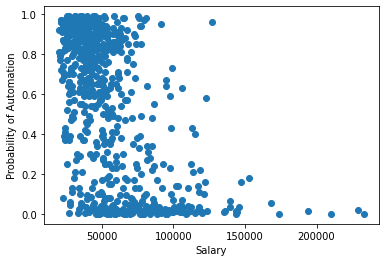

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

print('Correlation between salary and probability of automation:', np.corrcoef(all_data['A_MEAN'].to_numpy(), all_data['Probability'].to_numpy())[0][1])
plt.scatter(all_data['A_MEAN'], all_data['Probability'])
plt.xlabel("Salary")
plt.ylabel("Probability of Automation")
plt.show()

## State-by-state Breakdown

Finally, we will break down risk of automation state-by-state, taking into account each state's population.

In [28]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
state_job_losses = pd.DataFrame(columns=states)

for state in states:
    state_job_losses[state] = np.array([(all_data['Probability'] * all_data[state]).sum()])
    
state_job_losses = state_job_losses.T
state_job_losses['Estimate'] = state_job_losses[0]
del state_job_losses[0]

In [27]:
state_pops = pd.read_excel('../data/state-populations/state-populations.xlsx')

In [29]:
states_df = pd.DataFrame(columns=['State', 'fips', 'Loss Estimate', 'Population', 'Adjusted Loss'])
fips_data = pd.read_csv('../data/state_and_county_fips_master.csv')
states_df['State'] = states
states_df['Abbreviation'] = pd.read_csv("https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv")["Abbreviation"]
states_df['fips'] = states_df['State'].apply(lambda state: fips_data[fips_data['name'] == state.upper()]['fips'].mean()).astype(int)
states_df['Population'] = states_df['State'].apply(lambda state: state_pops[state_pops['State'] == state][2020].mean()).astype(int)
states_df['Loss Estimate'] = states_df['State'].apply(lambda state: (all_data['Probability'] * all_data[state]).sum()).astype(float)
states_df['Adjusted Loss'] = states_df['Loss Estimate'] / states_df['Population']

In [26]:
fig = px.choropleth(locations=states_df['Abbreviation'], locationmode="USA-states", color=states_df['Adjusted Loss'], scope="usa")
fig.show()